In [93]:
import numpy as np
import torch
import sys
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
import json
import os.path as path
import os


In [9]:
path_to_file = "runs/exp/PURE_1/saved_test_outputs/PURE_PURE_MMPD_tscan_outputs.pickle"

In [10]:
with open(path_to_file, 'rb') as f:
    data = pickle.load(f)

In [11]:
print(data.keys())

dict_keys(['predictions', 'labels', 'label_type', 'fs'])


In [17]:
df = pd.DataFrame.from_dict(data)

In [65]:
df.head(3)

,predictions,labels,label_type,fs
101,"{0: [[tensor(0.1399)], [tensor(0.5300)], [tens...","{0: [[tensor(0.1700)], [tensor(0.)], [tensor(-...",DiffNormalized,30
102,"{0: [[tensor(-0.3170)], [tensor(-0.1508)], [te...","{0: [[tensor(0.2917)], [tensor(-0.4265)], [ten...",DiffNormalized,30
103,"{0: [[tensor(0.0476)], [tensor(0.0917)], [tens...","{0: [[tensor(-0.1437)], [tensor(-0.4241)], [te...",DiffNormalized,30


In [19]:
result = df.iloc[[0]]

In [73]:
predictions = (result.reset_index()[["predictions"]]).to_dict().get('predictions').get(0)
labels = (result.reset_index()[["labels"]]).to_dict().get('labels').get(0)

In [75]:
preds = []
ref = []
for i in range(0,10):
    preds.append(predictions.get(i).numpy())
    ref.append(labels.get(i).numpy())

In [61]:
# chunk = res0.get('predictions').get(0).get(9)

In [81]:
preds_np = np.array(preds)
ref_np = np.array(ref)
preds_np.shape

(10, 180, 1)

In [82]:
bvp = preds_np.reshape(-1).reshape(-1)
ref = ref_np.reshape(-1).reshape(-1)

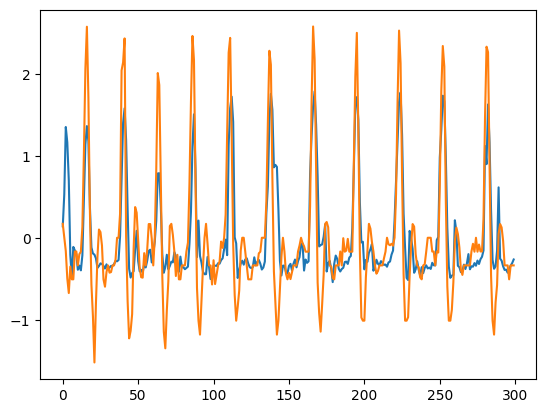

In [86]:
limit = 300
plt.plot(bvp[:limit])
plt.plot(ref[:limit])
plt.show()

In [107]:
up =  path.abspath(path.join(os.path.dirname(os.path.realpath('__file__')) ,"..\\.."))
print(up)
ref_path = "\\datasets\\PURE\\01-01\\01-01.json"
full_ref_path = up + ref_path
print(full_ref_path)


with open(full_ref_path, "r") as file:
    data_ref = json.load(file)


C:\Users\JacekR
C:\Users\JacekR\datasets\PURE\01-01\01-01.json


In [115]:
# v = data_ref["/FullPackage"][0]['Value']['waveform']
arr = data_ref["/FullPackage"]

In [151]:
ref_samples = len(arr)
ref_values = []
time_values = []
for w in range(0,ref_samples):
    ref_values.append(arr[w]['Value']['waveform'])
    time_values.append(arr[w]['Timestamp'])

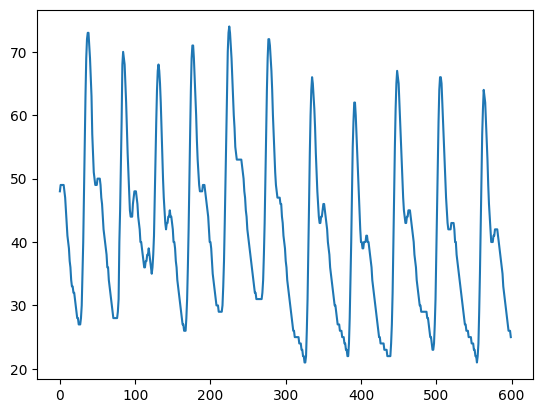

In [121]:
limit_r = 600
plt.plot(ref_values[:limit_r])
plt.show()

In [160]:
ref_values_np = np.array(ref_values)
print(ref_values_np.shape[0])

# Read GT timestamps
time_values_np = np.array(time_values)
time_values_np = (time_values_np - time_values_np[0])/1000000000

# target_length = len(bvp)
target_length = 2026  #number of frames/images in 01-01
print(target_length)
resampled_ref = np.interp(np.linspace(1, ref_values_np.shape[0], target_length), np.linspace(1, ref_values_np.shape[0], ref_values_np.shape[0]), ref_values_np)
print(resampled_ref.shape)

4018
2026
(2026,)


In [163]:
resampled_ref_n = (resampled_ref - np.mean(resampled_ref))
resampled_ref_n = resampled_ref_n/(np.max(resampled_ref_n))

In [164]:
scaled_m_ref = ref / np.max(ref) 

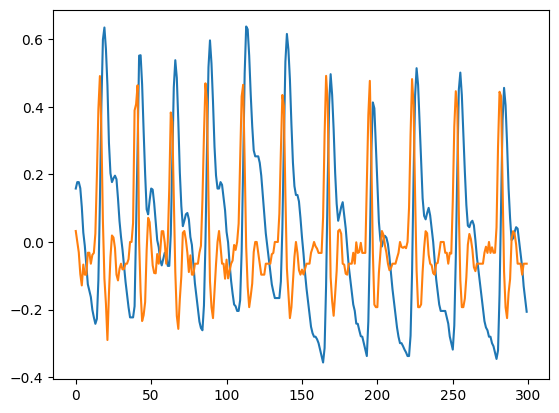

In [165]:
limit = 300
plt.plot(resampled_ref_n[:limit])
plt.plot(scaled_m_ref[:limit])
plt.show()

In [166]:
def diff_normalize_label(label):
        """Calculate discrete difference in labels along the time-axis and normalize by its standard deviation."""
        diff_label = np.diff(label, axis=0)
        diffnormalized_label = diff_label / np.std(diff_label)
        diffnormalized_label = np.append(diffnormalized_label, np.zeros(1), axis=0)
        diffnormalized_label[np.isnan(diffnormalized_label)] = 0
        return diffnormalized_label

In [167]:
norm_diff_ref = diff_normalize_label(resampled_ref)

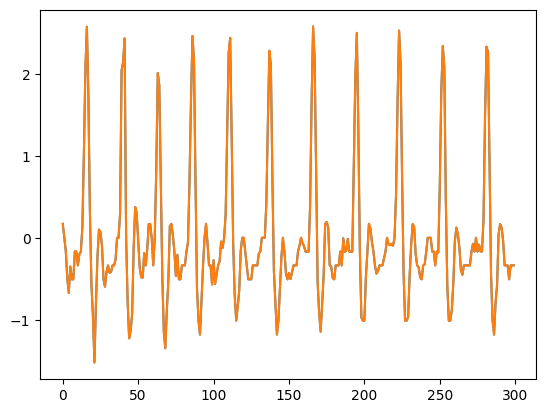

In [168]:
limit = 300
plt.plot(norm_diff_ref[:limit])
plt.plot(ref[:limit])
plt.show()

BUT GT data are recorded at specific timestamps

The same for frames - TS in filenames for PURE dataset

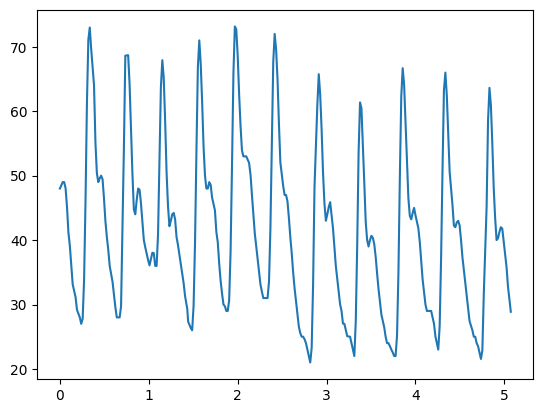

In [162]:
limit = 300
plt.plot(time_values_np[:limit], resampled_ref[:limit])
# plt.plot(resampled_ref[:limit])
plt.show()

In [172]:
# BUT GT data are recorded at specific timestamps
resampled_ref_ts = np.interp(np.linspace(0, np.max(time_values_np), target_length), time_values_np, ref_values_np)

In [175]:
norm_resampled_ref_ts = diff_normalize_label(resampled_ref_ts)

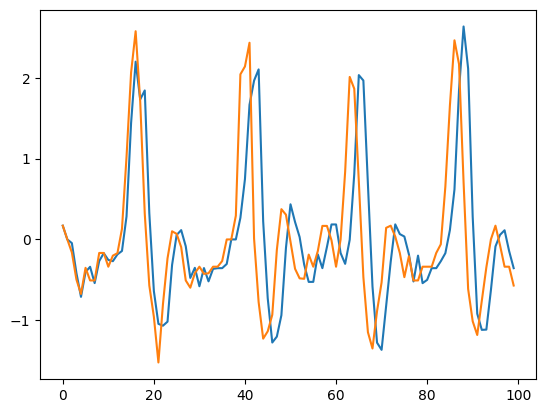

In [177]:
limit = 100
plt.plot(norm_resampled_ref_ts[:limit])
plt.plot(ref[:limit])
plt.show()